#Library and functions

In [ ]:
#--- Reproductibility ---
%env PYTHONHASHSEED=0
from numpy.random import seed
seed(42)
from tensorflow import keras
keras.utils.set_random_seed(42)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()
import glob, os

#---

import numpy as np
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from collections import Counter
import PIL
import glob
from tqdm import tqdm
import networkx as nx

#Graphics
from scipy.stats import gaussian_kde
from scipy.stats import norm
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#NN
from tensorflow import keras
from tensorflow.keras import layers, callbacks
#import tensorflow as tf

#sklearn modules: evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error

#Recurrence plots
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint
from mpl_toolkits.axes_grid1 import ImageGrid

#Dynamic time warping: grouping
from dtaidistance import dtw
from dtaidistance import dtw_ndim

In [ ]:
def parameter_stratification(value):
  '''
  Assumes the parameters of the logistic map will be in the 3 to 4 range.
  Categories:
  1 - Oscillations between two values
  2 - Oscillations between four values
  3 - Oscillations between nth values, where n is even and >4
  4 - Onset of chaos
  5 - Appearance of stability islands
  '''

  #Periods
  if (value < 3.44949):
    return 1
  if ( (value >= 3.44949) and (value < 3.54409) ):
    return 2
  if ( (value >= 3.54409) and (value < 3.56995) ):
    return 3
  if ( (value >= 3.56995) and (value < 3.82843) ):
    return 4
  if ( (value >= 3.82843) ):
    return 5

# Neural net training: regression

##Architecture

In [ ]:
model = keras.Sequential([
  keras.layers.Conv1D(3, 4, activation='relu'),
  keras.layers.Conv1D(3, 4, activation='relu'),
  keras.layers.AveragePooling1D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv1D(3, 4, activation='relu'),
  keras.layers.Conv1D(3, 4, activation='relu'),
  keras.layers.AveragePooling1D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv1D(3, 4, activation='relu'),
  keras.layers.Conv1D(3, 4, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(units=1024, activation='relu'),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=256, activation='relu'),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer="adam")

## Training

In [ ]:
#Read all ts from the train set
data_path = '/your/path/'
all_files = glob.glob(data_path + 'IC_*.csv"')

li = []
frame_columns = []
for filename in all_files:
  df = pd.read_csv(filename, index_col=None)
  df.rename(columns={'3.56':' 3.56'}, inplace=True)   #[Chaotic region]: df.rename(columns={'3.56':' 3.56'}, inplace=True)
  frame_columns.append(df.columns)                  #[Full region]: df.rename(columns={'3.0':' 3.0'}, inplace=True)
  li.append(df)

frame = pd.concat(li, axis=1, ignore_index=True)

questions = np.array([frame[n] for n in list(frame.columns)]).astype(np.float32)

solutions = []
for n in range(len(frame_columns)):
  for m in range(len(frame_columns[n])):
    solutions.append( frame_columns[n][m].split(" ")[1] )

solutions = np.array(solutions).astype(np.float32)

In [ ]:
N_size = 100

X_train, X_test, y_train, y_test = train_test_split(questions, solutions, test_size=0.3, random_state=42)

X_train = X_train.reshape(-1, N_size, 1)
X_test = X_test.reshape(-1, N_size, 1)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/300


I0000 00:00:1740005547.630150   86370 service.cc:145] XLA service 0x7fa63c0080b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740005547.630174   86370 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-19 19:52:27.689738: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-19 19:52:27.950146: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 37/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9094

I0000 00:00:1740005551.452998   86370 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.5656 - val_loss: 0.0954
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0847 - val_loss: 0.0898
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0841 - val_loss: 0.1085
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0592 - val_loss: 0.1611
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121 - val_loss: 0.0965
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083 - val_loss: 0.0546
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - val_loss: 0.0352
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - val_loss: 0.0219
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - val_loss: 0.0274
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0055 - val_loss: 0.0302
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - val_loss: 0.0258
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

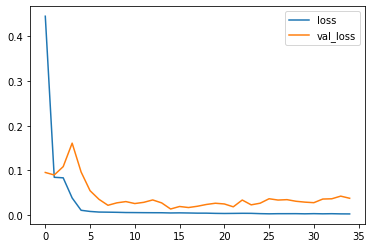

In [ ]:
#Full region, no noise
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740065661.420861   81527 service.cc:145] XLA service 0x7f2f54005110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740065661.420895   81527 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 12:34:21.512284: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 12:34:21.761560: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 39/281 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7869

I0000 00:00:1740065665.247948   81527 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 1.7944 - val_loss: 0.0249
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173 - val_loss: 0.0221
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170 - val_loss: 0.0205
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0174 - val_loss: 0.0170
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170 - val_loss: 0.0192
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.0155
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0079 - val_loss: 0.0159
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - val_loss: 0.0130
Epoch 9/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - val_loss: 0.0125
Epoch 10/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042 - val_loss: 0.0097
Epoch 11/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - val_loss: 0.0093
Epoch 12/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

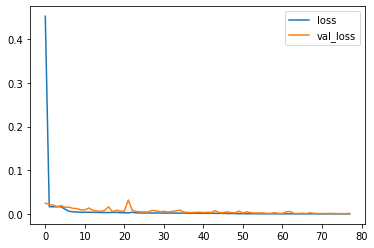

In [ ]:
#Chaotic region, no noise
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740057671.217834   28527 service.cc:145] XLA service 0x55dc6317fe10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740057671.217856   28527 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:21:11.269305: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:21:11.509779: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 39/280 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7282

I0000 00:00:1740057674.898161   28527 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.5609 - val_loss: 0.0990
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0847 - val_loss: 0.0912
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0843 - val_loss: 0.1044
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0754 - val_loss: 0.1577
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0155 - val_loss: 0.1013
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 - val_loss: 0.0540
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - val_loss: 0.0341
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064 - val_loss: 0.0252
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0059 - val_loss: 0.0318
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - val_loss: 0.0209
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - val_loss: 0.0217
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

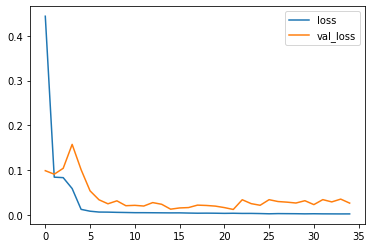

In [ ]:
#[Noise, 1E-2] Full region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740057860.323548   30173 service.cc:145] XLA service 0x561c6348db90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740057860.323578   30173 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:24:20.381643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:24:20.625293: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 40/280 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6453

I0000 00:00:1740057864.035219   30173 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.5614 - val_loss: 0.0962
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0849 - val_loss: 0.0912
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0843 - val_loss: 0.1361
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0449 - val_loss: 0.1496
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0111 - val_loss: 0.0866
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078 - val_loss: 0.0419
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065 - val_loss: 0.0280
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061 - val_loss: 0.0172
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - val_loss: 0.0272
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0311
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0055 - val_loss: 0.0253
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

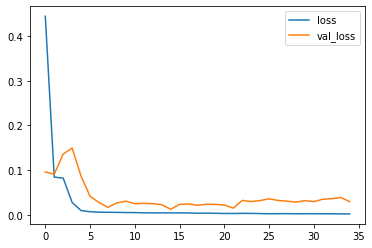

In [ ]:
#[Noise, 5E-2] Full region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740057954.751251   31601 service.cc:145] XLA service 0x55cdc94cf480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740057954.751277   31601 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:25:54.803000: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:25:55.034128: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 41/280 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5614

I0000 00:00:1740057958.377231   31601 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.5592 - val_loss: 0.0968
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0847 - val_loss: 0.0909
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0834 - val_loss: 0.2347
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0282 - val_loss: 0.1554
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - val_loss: 0.0680
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0077 - val_loss: 0.0374
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0357
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - val_loss: 0.0299
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0059 - val_loss: 0.0435
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - val_loss: 0.0529
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - val_loss: 0.0332
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

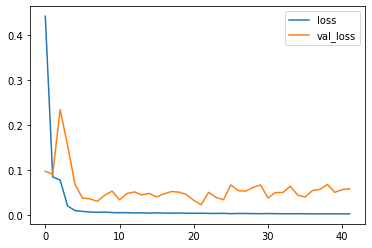

In [ ]:
#[Noise, 1E-1] Full region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

##Testing

On line 5 of the first cells, there's a renaming of the test set's columns to specific numbers.

These values are generated randomly for each test set, and are left here for reference in case you're reproducing our results.

###Chaotic region, no noise

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.56062582':' 3.56062582'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

#Apply model:
test_answers = model.predict(test_questions)

In [ ]:
df_res = pd.DataFrame(data={'test_actual': test_solutions, 'test_predictions': test_answers.flatten(), 'N': np.repeat(N_size, len(test_answers))})

In [ ]:
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])
print(np.min(df_res['diff']))
print(np.max(df_res['diff']))

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

0.000108242035
0.09967947
RMSE: 0.0398


###Full region, no noise

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00093893':' 3.00093893'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

#Apply model:
test_answers = model.predict(test_questions)

In [ ]:
df_res = pd.DataFrame(data={'test_actual': test_solutions, 'test_predictions': test_answers.flatten(), 'N': np.repeat(N_size, len(test_answers))})

In [ ]:
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])
print(np.min(df_res['diff']))
print(np.max(df_res['diff']))

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

0.00011253357
0.28564095
RMSE: 0.1138


###Full region, 1E-2 noise

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00017675':' 3.00017675'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

#Apply model:
test_answers = model.predict(test_questions)

In [ ]:
df_res = pd.DataFrame(data={'test_actual': test_solutions, 'test_predictions': test_answers.flatten(), 'N': np.repeat(N_size, len(test_answers))})

In [ ]:
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])
print(np.min(df_res['diff']))
print(np.max(df_res['diff']))

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

0.00021576881
0.27987218
RMSE: 0.113


###Full region, 5E-2 noise

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00103935':' 3.00103935'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

#Apply model:
test_answers = model.predict(test_questions)

In [ ]:
df_res = pd.DataFrame(data={'test_actual': test_solutions, 'test_predictions': test_answers.flatten(), 'N': np.repeat(N_size, len(test_answers))})

In [ ]:
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])
print(np.min(df_res['diff']))
print(np.max(df_res['diff']))

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

1.50203705e-05
0.28165793
RMSE: 0.1137


###Full region, 1E-1 noise

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00083329':' 3.00083329'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

#Apply model:
test_answers = model.predict(test_questions)

In [ ]:
df_res = pd.DataFrame(data={'test_actual': test_solutions, 'test_predictions': test_answers.flatten(), 'N': np.repeat(N_size, len(test_answers))})

In [ ]:
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])
print(np.min(df_res['diff']))
print(np.max(df_res['diff']))

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

0.00014567375
0.3334639
RMSE: 0.1516


# Neural net training: classification

##Architecture

In [ ]:
model = keras.Sequential([
  keras.layers.Conv1D(3, 4),
  keras.layers.Conv1D(3, 4),
  keras.layers.Activation('relu'),
  keras.layers.AveragePooling1D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv1D(3, 4),
  keras.layers.Conv1D(3, 4),
  keras.layers.Activation('relu'),
  keras.layers.AveragePooling1D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv1D(3, 4),
  keras.layers.Conv1D(3, 4),
  keras.layers.Activation('relu'),
  keras.layers.AveragePooling1D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=1024, activation='relu'),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=256, activation='relu'),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=6, activation='softmax')
])

model.compile(loss='CategoricalCrossentropy', optimizer="adam", metrics=['accuracy'])

## Training

In [ ]:
#Read all ts from the train set
data_path = '/home/llober/Downloads/ts_data_chaotic_no_noise/'

all_files = glob.glob(os.path.join(data_path , "IC_*.csv"))

li = []
frame_columns = []
for filename in all_files:
  df = pd.read_csv(filename, index_col=None)
  df.rename(columns={'3.56':' 3.56'}, inplace=True)   #[Chaotic region]: df.rename(columns={'3.56':' 3.56'}, inplace=True)
  frame_columns.append(df.columns)                  #[Full region]: df.rename(columns={'3.0':' 3.0'}, inplace=True)
  li.append(df)

frame = pd.concat(li, axis=1, ignore_index=True)

questions = np.array([frame[n] for n in list(frame.columns)]).astype(np.float32)

solutions_swp = []
for n in range(len(frame_columns)):
  for m in range(len(frame_columns[n])):
    solutions_swp.append( frame_columns[n][m].split(" ")[1] )

solutions_swp = np.array(solutions_swp).astype(np.float32)

solutions = []
for n in solutions_swp:
  solutions.append(parameter_stratification(n))

In [ ]:
N_size = 100

#Train/test split (gnuplot data):
X_train, X_test, y_train, y_test = train_test_split(questions, solutions, test_size=0.3, random_state=42)

X_train = X_train.reshape(-1, N_size, 1)
X_test = X_test.reshape(-1, N_size, 1)

In [ ]:
# Get one hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/300


I0000 00:00:1740058309.377632   33756 service.cc:145] XLA service 0x7fbddc003e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740058309.377654   33756 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:31:49.436310: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:31:49.686136: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 38/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4225 - loss: 1.6019

I0000 00:00:1740058314.245783   33756 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4530 - loss: 1.3790 - val_accuracy: 0.8146 - val_loss: 0.5259
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8266 - loss: 0.4434 - val_accuracy: 0.9461 - val_loss: 0.1908
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8923 - loss: 0.2832 - val_accuracy: 0.8928 - val_loss: 0.2353
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9129 - loss: 0.2304 - val_accuracy: 0.9019 - val_loss: 0.2220
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9170 - loss: 0.2217 - val_accuracy: 0.9118 - val_loss: 0.2091
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9230 - loss: 0.1972 - val_accuracy: 0.9235 - val_loss: 0.1973
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9264 - loss: 0.1981 - val_accuracy: 0.9316 - val_loss: 0.1781
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9420 - loss: 0.1507 - val_accuracy: 0.9321

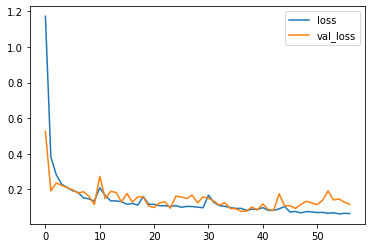

In [ ]:
#No noise, full
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740065883.962029   84539 service.cc:145] XLA service 0x560123499470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740065883.962056   84539 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 12:38:04.019378: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 12:38:04.271252: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 35/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5349 - loss: 1.3531

I0000 00:00:1740065889.018314   84539 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5690 - loss: 0.9136 - val_accuracy: 0.5912 - val_loss: 0.7639
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5854 - loss: 0.7740 - val_accuracy: 0.7745 - val_loss: 0.5000
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7982 - loss: 0.5042 - val_accuracy: 0.9543 - val_loss: 0.1843
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9355 - loss: 0.2287 - val_accuracy: 0.9723 - val_loss: 0.1174
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9639 - loss: 0.1506 - val_accuracy: 0.9751 - val_loss: 0.1078
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9690 - loss: 0.1318 - val_accuracy: 0.9764 - val_loss: 0.1029
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9702 - loss: 0.1264 - val_accuracy: 0.9756 - val_loss: 0.1061
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9695 - loss: 0.1321 - val_accuracy: 0.97

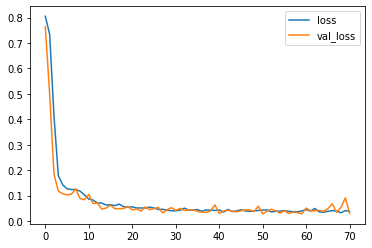

In [ ]:
#No noise, chaotic
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740058440.085060   35932 service.cc:145] XLA service 0x7f8bc4015f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740058440.085088   35932 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:34:00.142808: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:34:00.413077: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 37/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4220 - loss: 1.6092

I0000 00:00:1740058445.038728   35932 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4604 - loss: 1.3643 - val_accuracy: 0.8907 - val_loss: 0.3158
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8644 - loss: 0.3669 - val_accuracy: 0.9026 - val_loss: 0.2647
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9072 - loss: 0.2566 - val_accuracy: 0.9418 - val_loss: 0.1434
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9202 - loss: 0.2214 - val_accuracy: 0.9045 - val_loss: 0.2572
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9317 - loss: 0.1906 - val_accuracy: 0.9545 - val_loss: 0.1261
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9428 - loss: 0.1630 - val_accuracy: 0.9428 - val_loss: 0.1345
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9372 - loss: 0.1799 - val_accuracy: 0.9390 - val_loss: 0.1603
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9448 - loss: 0.1527 - val_accuracy: 0.9305

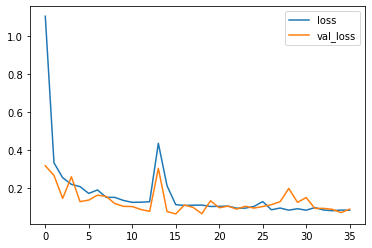

In [ ]:
#1E-1 noise
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740058547.863790   37412 service.cc:145] XLA service 0x7ff5980034f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740058547.863812   37412 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:35:47.917344: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:35:48.164429: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 33/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4200 - loss: 1.6215

I0000 00:00:1740058552.815837   37412 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4567 - loss: 1.3682 - val_accuracy: 0.8128 - val_loss: 0.4497
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8369 - loss: 0.4169 - val_accuracy: 0.9236 - val_loss: 0.1902
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9099 - loss: 0.2472 - val_accuracy: 0.9475 - val_loss: 0.1356
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9195 - loss: 0.2199 - val_accuracy: 0.9535 - val_loss: 0.1335
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9128 - loss: 0.2801 - val_accuracy: 0.9350 - val_loss: 0.2114
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9401 - loss: 0.1632 - val_accuracy: 0.9590 - val_loss: 0.0989
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9415 - loss: 0.1547 - val_accuracy: 0.9607 - val_loss: 0.0899
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9476 - loss: 0.1401 - val_accuracy: 0.9653

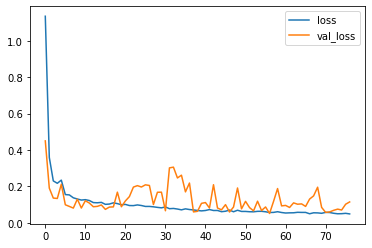

In [ ]:
#1E-2 noise
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740058682.383708   40239 service.cc:145] XLA service 0x56357802cb20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740058682.383730   40239 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:38:02.444468: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:38:02.689826: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 35/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4283 - loss: 1.6160

I0000 00:00:1740058687.388894   40239 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4595 - loss: 1.3662 - val_accuracy: 0.8546 - val_loss: 0.3727
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8495 - loss: 0.3927 - val_accuracy: 0.9333 - val_loss: 0.1777
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9017 - loss: 0.2744 - val_accuracy: 0.9420 - val_loss: 0.1535
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9242 - loss: 0.2153 - val_accuracy: 0.9122 - val_loss: 0.2004
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9290 - loss: 0.1889 - val_accuracy: 0.9606 - val_loss: 0.1271
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9396 - loss: 0.1626 - val_accuracy: 0.9647 - val_loss: 0.1024
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9401 - loss: 0.1658 - val_accuracy: 0.9445 - val_loss: 0.1332
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9452 - loss: 0.1489 - val_accuracy: 0.9572

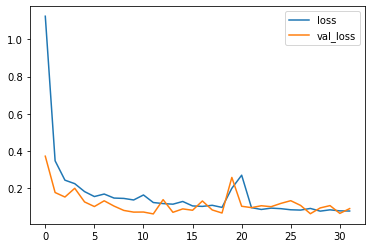

In [ ]:
#5E-2 noise
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

##Testing

On line 5 of the first cells, there's a renaming of the test set's columns to specific numbers.

These values are generated randomly for each test set, and are left here for reference in case you're reproducing our results.

###No noise, chaotic

In [ ]:
#Read all ts from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.56062582':' 3.56062582'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions_swp = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Accuracy: 0.989


In [ ]:
label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
3,0.789474,1.000000,0.882353,30.000
4,0.994737,0.986087,0.990393,575.000
5,1.000000,0.992405,0.996188,395.000
accuracy,0.989000,0.989000,0.989000,0.989
macro avg,0.928070,0.992831,0.956311,1000.000
weighted avg,0.990658,0.989000,0.989441,1000.000


###No noise, full

In [ ]:
#Read all ts from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00093893':' 3.00093893'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions_swp = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Accuracy: 0.962


In [ ]:
label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,1.000000,0.997802,0.998900,455.000
2,0.870370,1.000000,0.930693,94.000
3,0.382353,0.500000,0.433333,26.000
4,0.986842,0.914634,0.949367,246.000
5,1.000000,0.983240,0.991549,179.000
accuracy,0.962000,0.962000,0.962000,0.962
macro avg,0.847913,0.879135,0.860769,1000.000
weighted avg,0.968519,0.962000,0.964283,1000.000


###1E-1 noise

In [ ]:
#Read all ts from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00083329':' 3.00083329'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions_swp = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.985


In [ ]:
label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,0.993464,1.000000,0.996721,456.000
2,1.000000,0.967391,0.983425,92.000
3,1.000000,0.653846,0.790698,26.000
4,0.956204,1.000000,0.977612,262.000
5,1.000000,0.981707,0.990769,164.000
accuracy,0.985000,0.985000,0.985000,0.985
macro avg,0.989934,0.920589,0.947845,1000.000
weighted avg,0.985545,0.985000,0.984159,1000.000


###1E-2 noise

In [ ]:
#Read all ts from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00017675':' 3.00017675'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions_swp = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Accuracy: 0.99


In [ ]:
label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,450.00
2,1.000000,0.970588,0.985075,102.00
3,0.804878,1.000000,0.891892,33.00
4,0.992424,0.981273,0.986817,267.00
5,1.000000,0.986486,0.993197,148.00
accuracy,0.990000,0.990000,0.990000,0.99
macro avg,0.959460,0.987670,0.971396,1000.00
weighted avg,0.991538,0.990000,0.990383,1000.00


###5E-2 noise

In [ ]:
#Read all ts from the train set
data_path = '/your/path/'
ts_test = pd.read_csv(data_path + 'test.csv')
ts_test.rename(columns={'3.00103935':' 3.00103935'}, inplace=True)

test_questions = np.array([ts_test[n] for n in list(ts_test.columns)]).astype(np.float32)
test_solutions_swp = np.array([ts_test.columns[n].split(" ")[1] for n in range(len(ts_test.columns))]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy: 0.979


In [ ]:
label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,454.000
2,0.961905,1.000000,0.980583,101.000
3,0.812500,0.448276,0.577778,29.000
4,0.944882,0.987654,0.965795,243.000
5,1.000000,0.988439,0.994186,173.000
accuracy,0.979000,0.979000,0.979000,0.979
macro avg,0.943857,0.884874,0.903668,1000.000
weighted avg,0.977321,0.979000,0.976477,1000.000
